In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

train_data = '/content/drive/My Drive/Datasheet/Image Classification/1-9 Classification/train.csv'
test_data  = '/content/drive/My Drive/Datasheet/Image Classification/1-9 Classification/test.csv'

Mounted at /content/drive


In [2]:
train = pd.read_csv(train_data)
test  = pd.read_csv(test_data)

In [ ]:
train.info()
train.columns

In [ ]:
test.info()
test.columns

In [ ]:
print('Jumlah Missing Values :\n')
print(train.isnull().sum().sum())

In [ ]:
print('Jumlah distribusi label pada data train :\n')
print(train['label'].value_counts())

In [ ]:
train['label'].unique()

In [3]:
print(train.shape)
print(test.shape)
print(train.columns[:10])
print(test.columns[:10])

(42000, 785)
(28000, 784)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8'],
      dtype='object')
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9'],
      dtype='object')


In [4]:
X_train = train.drop('label', axis=1).to_numpy()
y_train = train['label'].to_numpy()
print(f'Shape train X: {X_train.shape}, y:{y_train.shape}')

Shape train X: (42000, 784), y:(42000,)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(y_train)
plt.title('Distribusi kelas di Train Dataset:')
plt.show()

In [5]:
#Preprocessing
from tensorflow.keras.utils import to_categorical

X_test = test.to_numpy()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes = 10)

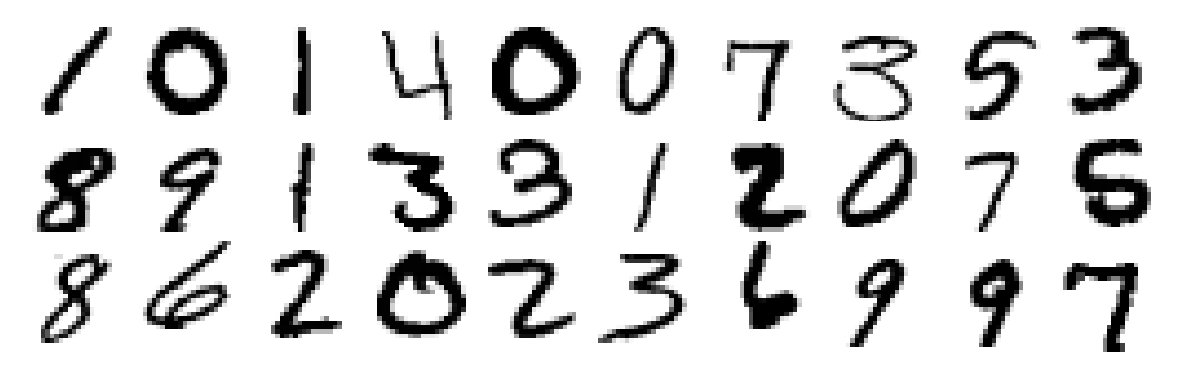

In [6]:
import matplotlib.pyplot as plt

# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train_sp, X_val, y_train_sp, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
print('Train:',X_train_sp.shape, y_train_sp.shape)
print('Val :',X_val.shape, y_val.shape)

Train: (37800, 28, 28, 1) (37800, 10)
Val : (4200, 28, 28, 1) (4200, 10)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)
datagen.fit(X_train_sp)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense

# BUILD CONVOLUTIONAL NEURAL NETWORK
def build_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Block 2
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Block 3
    model.add(Conv2D(128, kernel_size=4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model


# Contoh penggunaan
model = build_cnn()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,242 (1.25 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)

In [10]:
history = model.fit(
    datagen.flow(X_train_sp, y_train_sp),
    epochs=20,
    validation_data =(X_val,y_val)
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 155s 126ms/step - accuracy: 0.7436 - loss: 0.8365 - val_accuracy: 0.9819 - val_loss: 0.0568
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 146s 124ms/step - accuracy: 0.9564 - loss: 0.1437 - val_accuracy: 0.9890 - val_loss: 0.0382
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.9664 - loss: 0.1153 - val_accuracy: 0.9876 - val_loss: 0.0361
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 146s 123ms/step - accuracy: 0.9703 - loss: 0.0997 - val_accuracy: 0.9890 - val_loss: 0.0331
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 146s 124ms/step - accuracy: 0.9766 - loss: 0.0788 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.9774 - loss: 0.0759 - val_accuracy: 0.9569 - val_loss: 0.1215
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 145s 122ms/step - accuracy: 0.9794 - loss: 0.0722 - val_accuracy: 0.9912 - val_loss: 0.0303
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 202s 122ms/step - accuracy: 0.9

In [11]:
prediction = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step


In [12]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

print(f'Akurasi Training dari model ini adalah:{training_accuracy[-1]:.4f}')
print(f'Akurasi Validation dari model ini adalah:{validation_accuracy[-1]:.4f}')

Akurasi Training dari model ini adalah:0.9891
Akurasi Validation dari model ini adalah:0.9933


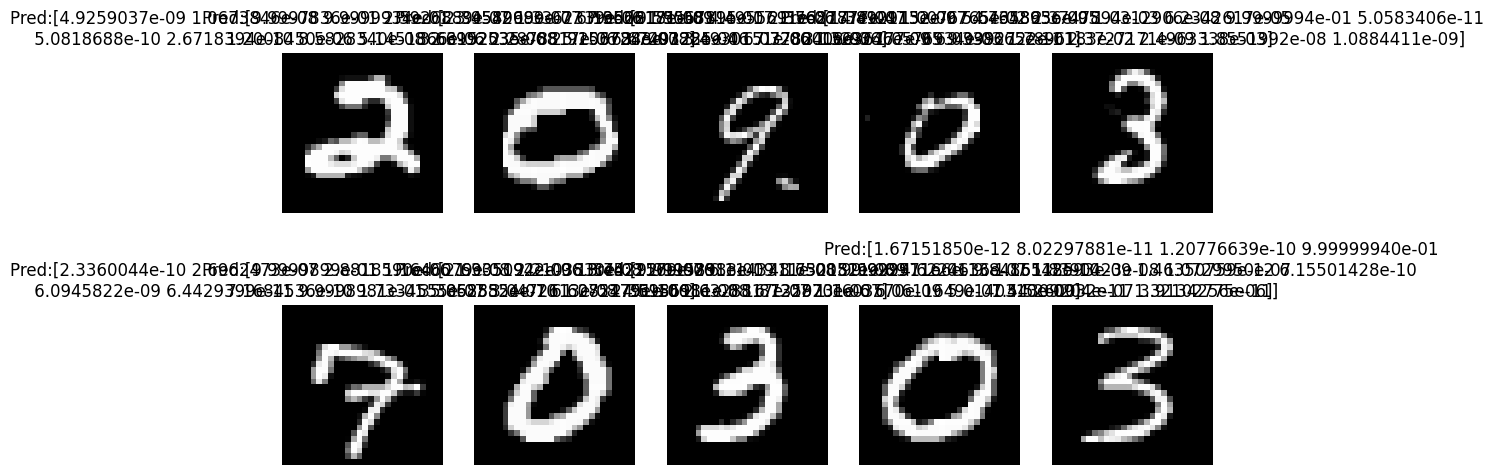

In [14]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  plt.title(f'Pred:{prediction[i]}')
  plt.axis('off')
plt.show()

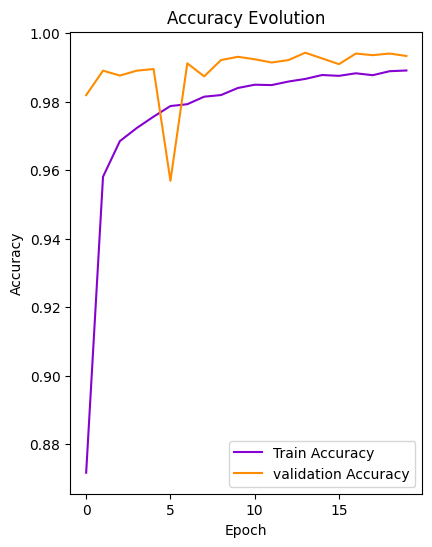

In [15]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color ='#8502d1')
plt.plot(history.history['val_accuracy'], label='validation Accuracy', color='darkorange')

plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1]:
from google.colab import files
model.save('image_classification_CNN.h5')
files.download('image_classification_CNN.h5')

NameError: name 'model' is not defined